# Exploratory Data Analysis (EDA)

In this notebook, we will perform exploratory data analysis (EDA) on the baseball performance dataset. We will calculate descriptive statistics, visualize the distribution of salaries, and explore relationships between performance metrics and salaries.




In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data
performance_data = pd.read_csv('../data/performance_data.csv')

# Display the first few rows of the DataFrame
performance_data.head()

,playerID,yearID,stint_x,teamID,lgID_x_x,G_batting,AB_batting,R_x,H_batting,2B,...,DP,PB,WP_y,SB_y,CS_y,ZR,lgID_y,salary,inducted,batting_avg
0,aardsda01,2004,1,SFN,NL,11,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NL,300000.0,0,0.0
1,aardsda01,2006,1,CHN,NL,45,2,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0
2,aardsda01,2007,1,CHA,AL,25,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,AL,387500.0,0,0.0
3,aardsda01,2008,1,BOS,AL,47,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,AL,403250.0,0,0.0
4,aardsda01,2009,1,SEA,AL,73,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,AL,419000.0,0,0.0


## Descriptive Statistics

We will start by calculating and displaying some basic descriptive statistics for the dataset.


In [6]:
# Descriptive Statistics
performance_data.describe()


,yearID,stint_x,G_batting,AB_batting,R_x,H_batting,2B,3B,HR_x,RBI,...,A,E,DP,PB,WP_y,SB_y,CS_y,ZR,salary,batting_avg
count,215099.000000,215099.000000,215099.000000,215099.000000,215099.000000,215099.000000,215099.000000,215099.000000,215099.000000,215099.000000,...,215099.000000,215099.000000,215099.000000,215099.000000,215099.000000,215099.000000,215099.000000,215099.000000,2.150990e+05,215099.000000
mean,1959.364865,1.072181,66.097797,203.531262,28.485716,55.406036,9.389044,2.094975,4.208485,25.902403,...,46.151502,4.651607,10.161414,0.423465,0.097495,1.427431,0.843714,0.008196,3.968425e+05,0.206967
std,40.090789,0.277344,50.986566,207.074131,33.815056,61.606228,11.359546,3.428170,7.784199,32.017115,...,97.115451,8.693740,24.843096,2.853094,1.500530,9.794129,6.304989,0.166522,1.722067e+06,0.120341
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1927.000000,1.000000,22.000000,18.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.148148
50%,1963.000000,1.000000,51.000000,112.000000,12.000000,26.000000,4.000000,0.000000,1.000000,11.000000,...,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.239583
75%,1995.000000,1.000000,114.000000,381.000000,49.000000,101.000000,16.000000,3.000000,5.000000,43.000000,...,37.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.281690
max,2022.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,...,641.000000,119.000000,194.000000,114.000000,63.000000,293.000000,189.000000,15.000000,3.300000e+07,1.000000


## Visualizations

Let's visualize the distribution of salaries and the relationship between salary and batting average.


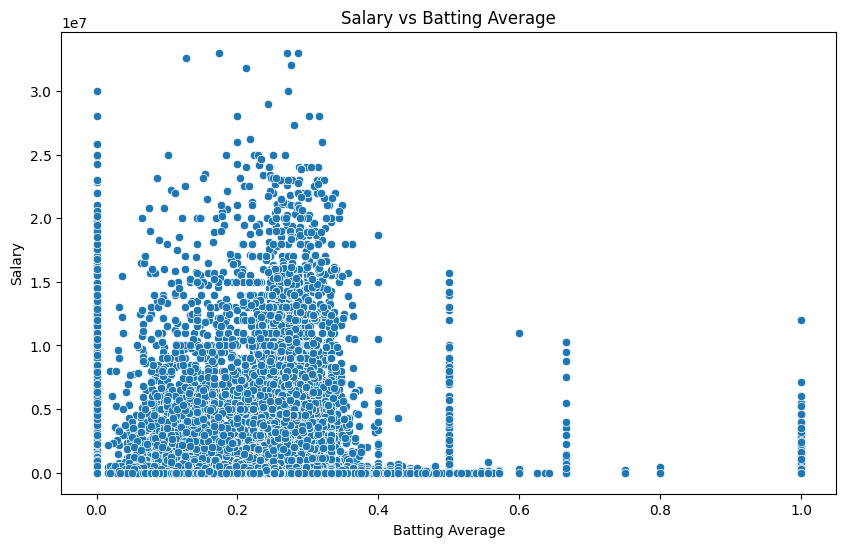

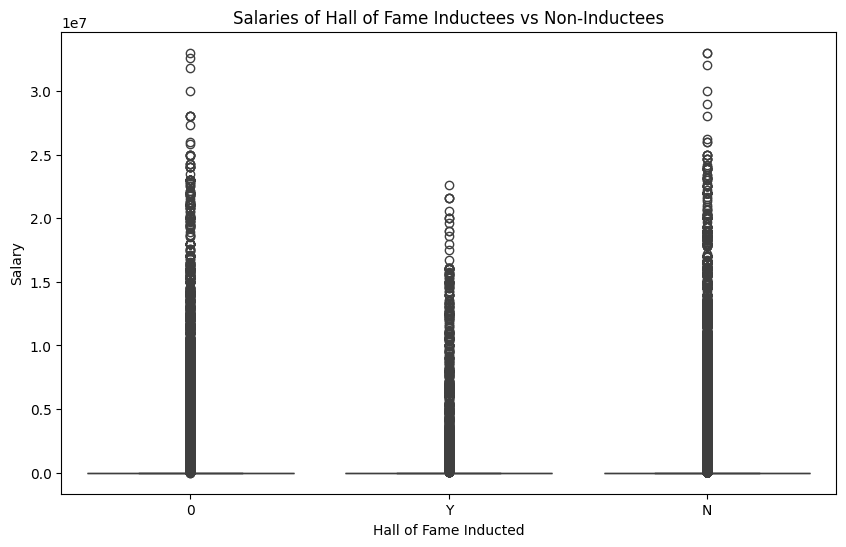

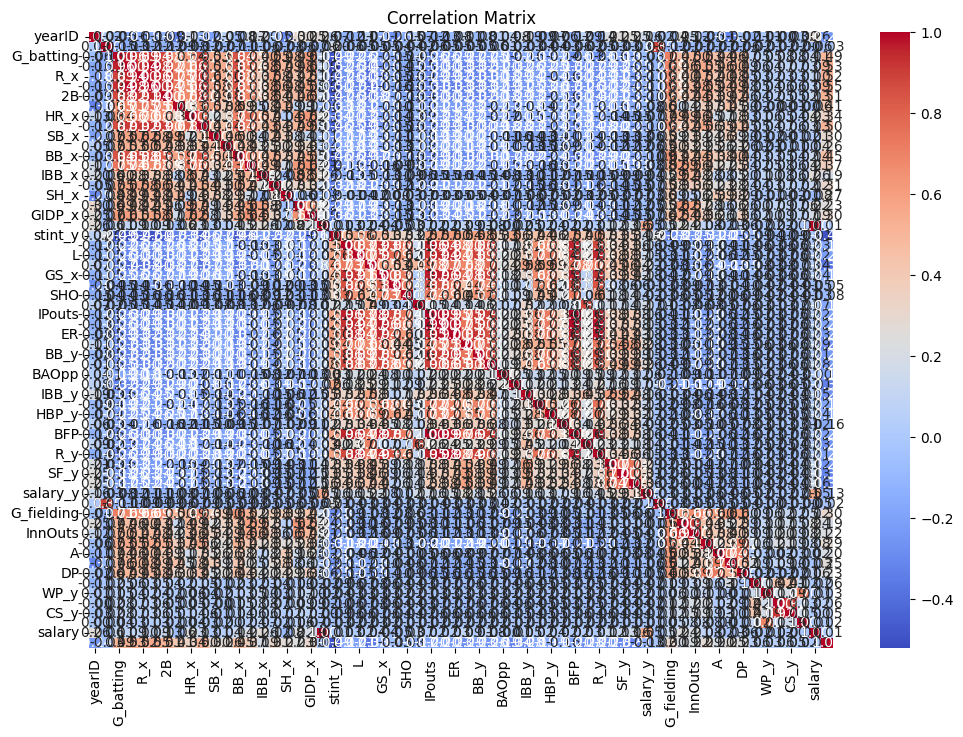

In [7]:
# Visualization: Scatter plot of Salary vs Batting Average
plt.figure(figsize=(10, 6))
sns.scatterplot(x='batting_avg', y='salary', data=performance_data)
plt.title('Salary vs Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Salary')
plt.show()

# Visualization: Compare salaries of Hall of Fame inductees and non-inductees
plt.figure(figsize=(10, 6))
sns.boxplot(x='inducted', y='salary', data=performance_data)
plt.title('Salaries of Hall of Fame Inductees vs Non-Inductees')
plt.xlabel('Hall of Fame Inducted')
plt.ylabel('Salary')
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation matrix
numeric_cols = performance_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()